# Operations and Price Optimization

### The aim of this project it to explore, identify and help optimize the operational and pricing opportunities that exist for a leading events company. The data-sets consist of order specific information (information about event attendees) as well as event specific outcomes (attendee figures, registration sources and more). 
### While early exploration focuses on broader trends, we focus our attention on pricing as historically the pricing of a service such an event has been mainly a function of competition and past pricing. We hypothesize that there are opportunities in certain markets to raise event prices while raising revenue numbers.

In [63]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [64]:
orders = pd.read_csv('orders_after_wrangling.csv', index_col=0, engine='python')
orders.head()

,Created,Account_SIC,Price_List,Price_List_Type,Total_Net_Price,Account_Market,Account_Name,Campaign_Name,Contact_Job_Function,Contact_Job_Title,...,Order_Date,Order_Number,Registration_Channel,Registration_Type,Sales_Method,Sales_Source,Sales_Source_Cat,id,Group_Size,job_title
0,1/3/11 9:22,Management Consulting Services,19698.001 - Vendor,Vendor,15500.0,Secondary,Taleo,NaN,LW10,Senior Vice President and General Counsel,...,1/3/11,1-3341865771,Not Available,Sponsor,NaN,SMBARRETT,Sponsorship,34473,1,VP
1,1/3/11 9:47,Army,10665.005 - Standard,Primary,1949.0,Primary,US Army Audit Agency,10665.005 HCMD 2011: Unknown without MACs,HR254,Human Capital Manager,...,1/3/11,1-3341957177-A,Website,Delegate,NaN,Marketing,Marketing,12735,2,Manager
2,1/3/11 9:48,Web Search Portals,10701.005-Vendor,Vendor,3089.0,Secondary,Google,10701.005 ETail West 2011 Delegate Sales Campa...,HR253,Head Of Industry,...,1/3/11,1-3342074626,Outbound Phone,Delegate,Full Delegate Sale,TSPETERS,Delegate Sales,66732,1,C-Level
3,1/3/11 9:51,Software As A Service Solution Providers,10701.005-Vendor,Vendor,0.0,Secondary,Gigya,NaN,MK48,National Sales Director,...,1/3/11,1-3342079261,Phone,Sponsorship Guest,NaN,Marketing,Marketing,11220,1,Director
4,1/3/11 9:53,Software As A Service Solution Providers,10553.005 - Vendor,Vendor,0.0,Secondary,PTC,NaN,MK7,Marketing Communications Manager,...,1/3/11,1-3342070411-A,Not Available,Sponsorship Guest,NaN,Marketing,Marketing,5795,2,Manager


In [65]:
# Orders - Converting data types
orders['Created']  = pd.to_datetime(orders['Created'])
orders['Price_List_Type']  = orders['Price_List_Type'].astype('category')


orders['Account_Market'] = orders['Account_Market'].astype('category')
orders['Currency'] = orders['Currency'].astype('category')
orders['Event_Plan_Start_Date']  = pd.to_datetime(orders['Event_Plan_Start_Date']).dt.normalize()
orders['Order_Date']  = pd.to_datetime(orders['Order_Date']).dt.normalize()
orders['Registration_Channel'] = orders['Registration_Channel'].fillna(value='Not Available').astype('category')
orders['Registration_Type']  = orders['Registration_Type'].astype('category')
orders['Registration_Type']  = orders['Registration_Type'].astype('category')
orders['Sales_Source_Cat']  = orders['Sales_Source_Cat'].astype('category')

orders.dtypes

Created                  datetime64[ns]
Account_SIC                      object
Price_List                       object
Price_List_Type                category
Total_Net_Price                 float64
Account_Market                 category
Account_Name                     object
Campaign_Name                    object
Contact_Job_Function             object
Contact_Job_Title                object
Currency                       category
Event_Plan_Code                 float64
Event_Plan_Name                  object
Event_Plan_Start_Date    datetime64[ns]
MAC                              object
Order_Date               datetime64[ns]
Order_Number                     object
Registration_Channel           category
Registration_Type              category
Sales_Method                     object
Sales_Source                     object
Sales_Source_Cat               category
id                                int64
Group_Size                        int64
job_title                        object


### Revenue trends from 2012 have been positive, however we are seeking to learn whether there exist missed operational opportunities 

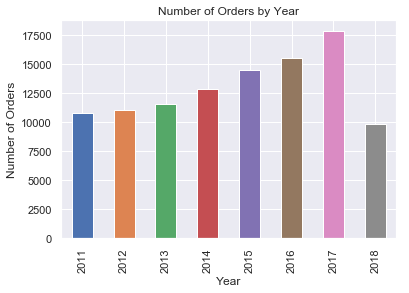

In [66]:
#Breakdown of orders by division

ax = orders.groupby(orders.Order_Date.dt.year).Sales_Source_Cat.count().plot(kind='bar', \
                                                                             title='Number of Orders by Year')
ax.set_xlabel("Year")
ax.set_ylabel("Number of Orders")
plt.show()

#NEED TO REMOVE DECIMALS ON YEARS

### There are two ways in which attendees register for the events: 1. passively - online, chat or customer service or 2. actively - through a consultative phone conversation with a sales rep. Seems the growth in attendee registrations has come mainly through the latter. 

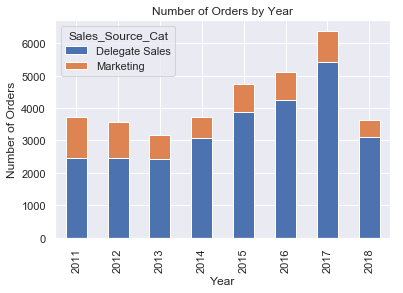

In [67]:
orders_delegate = orders[orders.Registration_Type == 'Delegate']
ax = orders_delegate.groupby([orders_delegate.Order_Date.dt.year, 'Sales_Source_Cat']).Sales_Source_Cat.count().unstack('Sales_Source_Cat')\
.plot(kind='bar', stacked=True, title='Number of Orders by Year')
ax.xaxis_date()
ax.set_xlabel("Year")
ax.set_ylabel("Number of Orders")
plt.show()

### Some follow-up questions:
### Have the prices between the two groups been the same? 
### Is this pattern consistent accross all event categories?
### To what extent is discounting playing a factor in an attendees decision to attend? We see that the last day of the month has consisantely been the day with the most regiatrations. 

In [68]:
# Identifying top 10 days in terms of number of delegate registrations
top10days = orders_delegate['Total_Net_Price'].groupby(orders_delegate.Order_Date).agg(['mean', 'count'])
top10days.sort_values('count', ascending=False).head(10)

#Top 10 days all within the last two years
#All fall on the last 2 days of the month!

,mean,count
Order_Date,,
2018-01-31,1341.435957,141
2018-04-30,1254.289841,126
2017-01-31,1390.507265,117
2018-02-28,1103.890000,103
2017-02-28,1404.298600,100
2017-03-31,1354.684105,95
2017-09-29,1212.224839,93
2016-08-31,1114.764767,86
2015-01-30,1805.966395,86


### Interesting to see the last day of month to consistantely be the day with the largest number of regisrations. Two possible factors: discounting (last day of the discount) or an internal comission deadline.
### Lets try to look only at marketing orders to see if we see a similar pattern as this removes the comission element:

In [69]:
# Identifying top 10 days in terms of number of delegate registrations
orders_delegate_marketing = orders_delegate[orders_delegate.Sales_Source_Cat == 'Marketing']
top10days = orders_delegate_marketing['Total_Net_Price'].groupby(orders_delegate_marketing.Order_Date)\
.agg(['mean', 'count'])
top10days.sort_values('count', ascending=False).head(10)

,mean,count
Order_Date,,
2015-01-30,2130.576000,25
2018-03-30,1313.184091,22
2011-02-18,2037.397727,22
2017-01-31,1524.832500,20
2011-08-31,1437.776316,19
2011-01-14,1031.750000,19
2015-08-31,1691.861111,18
2017-03-31,1634.436111,18
2011-01-31,1873.613889,18


###  8 of the top 10 such days still fall on the last day of the month. This tells us that the discounts have an effect on an attendees. purchasing decision.

### Food for thought: Could another system that offers more frequent discounts (e.g. discounts based on remaining ticket quantity, more frequent discounting) contribute to the utility of this effect? A/B test idea.

In [8]:
# Identifying top 10 days in terms of sponsor registrations
orders_sponsors = orders[orders.Registration_Type == 'Sponsor']
top10days = orders_sponsors['Total_Net_Price'].groupby(orders_sponsors.Order_Date).agg(['mean', 'count'])
top10days.sort_values('count', ascending=False).head(10)

,mean,count
Order_Date,,
2018-01-05,17613.636364,22
2016-12-20,20816.666667,21
2017-11-03,22033.910000,20
2017-11-07,23030.000000,20
2016-10-25,17355.000000,20
2018-01-16,18600.000000,20
2018-04-13,23907.894737,19
2018-02-26,30183.421053,19
2016-11-14,20400.000000,18


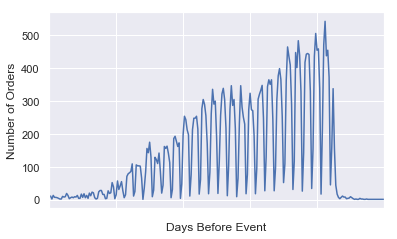

In [9]:
#Calculating difference betwen order date and event date
orders['Days_Ahead_of_Event'] = orders['Event_Plan_Start_Date']-orders['Order_Date']

#Plotting number of registrations in terms of time before event start
orders_delegate = orders[orders.Registration_Type == 'Delegate']
ax = orders_delegate.groupby([orders_delegate.Days_Ahead_of_Event]).Order_Number.count().plot()
plt.xlim(250,0)
plt.xticks([250, 200, 150, 100, 50, 0])  #Doesn't work - how to set x axis labels?
ax.set_xlabel("Days Before Event")
plt.xticks(rotation=30)
ax.set_ylabel("Number of Orders")
plt.show()

### Attendee registrations seem to be consistantely growing as the event approaches

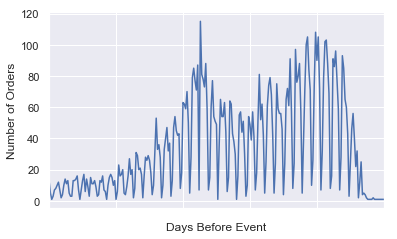

In [10]:
#Number of sponsorship deals in terms of time before event start

orders_sponsors = orders[orders.Registration_Type == 'Sponsor']
ax = orders_sponsors.groupby([orders_sponsors.Days_Ahead_of_Event]).Order_Number.count().plot()
plt.xlim(250,0)
plt.xticks([250, 200, 150, 100, 50, 0])  #Doesn't work - how to set x axis labels?
ax.set_xlabel("Days Before Event")
plt.xticks(rotation=30)
ax.set_ylabel("Number of Orders")
plt.show()

### On the other hand - Sponsorship deals do not follow a similar pattern. A two sales person camapign seems to "deflate" the momentum of the campaign before picking back up towards the day of the event.

### Food for thought: Could the second sales person begin working on a camapign earlier to have a "smoother handoff"

In [11]:
# Do certain types of companies (SIC) that pay more or less to attend conferences?
orders_delegate = orders[orders.Registration_Type == 'Delegate']
orders_delegate = orders_delegate[orders_delegate.Price_List_Type == 'Primary']
top10SIC = orders_delegate['Total_Net_Price'].groupby(orders_delegate.Account_SIC).agg(['mean', 'count'])
top10SIC.sort_values('count', ascending=False).head(10)

,mean,count
Account_SIC,,
Pharmaceutical,1848.827026,1019
Clothing Stores,919.196437,988
Investment Banking and Securities Dealing,1390.153759,939
Department Stores,987.931166,643
"Medical, Dental, and Hospital Equipment and 423450",1514.597556,626
Software As A Service Solution Providers,1705.706288,563
"Cosmetics, Beauty Supplies, and Perfume Stores",1031.078716,444
Bio-Technology,2011.191422,443
Clothing and Clothing Accessories Stores,819.097196,428


In [12]:
top10SIC_10_or_more = top10SIC[top10SIC['count'] >=10]
top10SIC_10_or_more.sort_values('mean', ascending=False).head(10)

,mean,count
Account_SIC,,
Bio-Technoloy,2615.150000,10
Research and Development in the Social Sciences,2579.173077,13
IQ - Nanotech research and development,2578.635185,27
Drugs and Druggists' Sundries Merchant Whole424210,2283.964286,35
Pharmaceutical Preparation Manufacturing,2236.649179,207
"Research and Development in the Physical, En541710",2234.038462,26
Pharmaceutical and Medicine Manufacturing,2210.934615,65
Advertising/Marketing,2162.774773,176
Biotechnology & Drugs,2105.762647,34


### The highest average prices paid come from the pharma or related industries.

### Will check this same breakdown for retail, logistics and procurement events after merge.

In [13]:
#What is the most popular day of the week to purchase an event ticket?
#No Real outliers - Didnt expect Tuesday but not significantely more.

orders_delegate['day_of_week'] = orders_delegate['Order_Date'].dt.weekday_name
orders_delegate['Order_Number'].groupby(orders_delegate['day_of_week']).count()

day_of_week
Friday       5708
Monday       5102
Saturday       90
Sunday         68
Thursday     5771
Tuesday      5816
Wednesday    5526
Name: Order_Number, dtype: int64

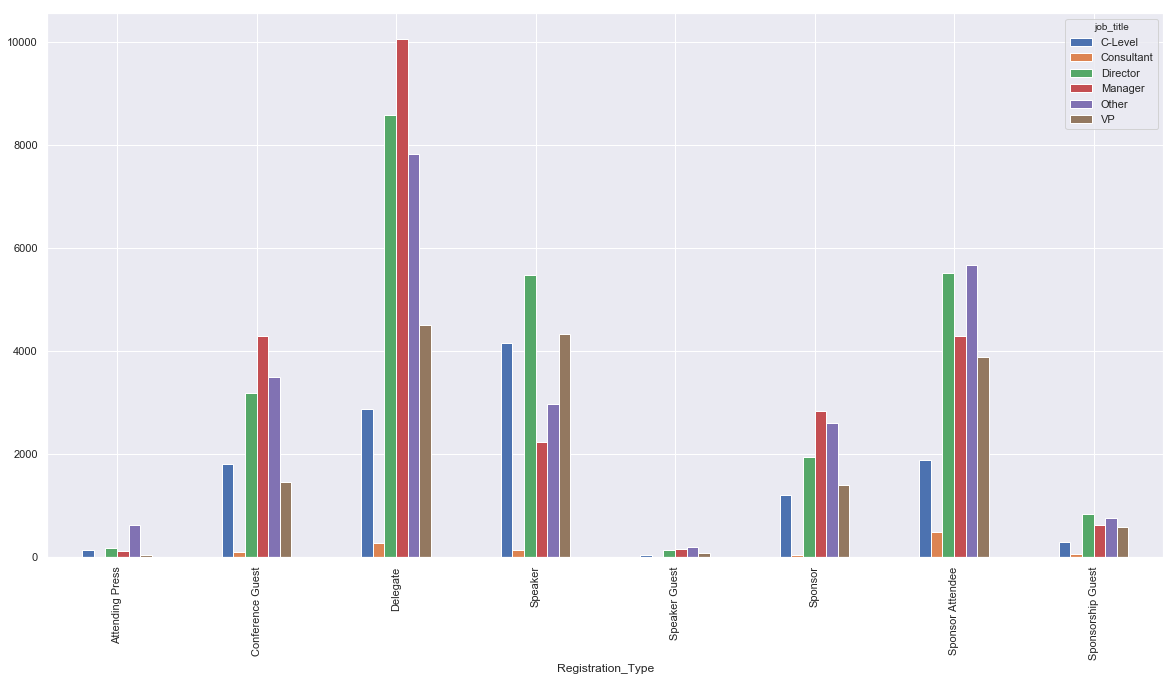

In [14]:
orders['job_title'].groupby(orders['Registration_Type']).value_counts().unstack().plot(kind='bar', figsize=(20,10))

#orders['job_title'].groupby(orders['Registration_Type']).count.plot()
#plt.show()

In [15]:
orders['job_title'].groupby(orders['Registration_Type']).value_counts(normalize=True)

# Delegates - 25% Director, 13% VP, 8% C-Level
# Speakers - 28% Director, 22% VP, 21% C-Level
# Conference Guset - 22% Director, 10% VP, 12% C-Level (This seems low for Guests)

Registration_Type  job_title 
Attending Press    Other         0.568352
                   Director      0.155431
                   C-Level       0.131086
                   Manager       0.107678
                   VP            0.034644
                   Consultant    0.002809
Conference Guest   Manager       0.299419
                   Other         0.244070
                   Director      0.222798
                   C-Level       0.125674
                   VP            0.100903
                   Consultant    0.007137
Delegate           Manager       0.294960
                   Director      0.251482
                   Other         0.229596
                   VP            0.132048
                   C-Level       0.084023
                   Consultant    0.007892
Speaker            Director      0.284047
                   VP            0.223939
                   C-Level       0.215227
                   Other         0.154082
                   Manager       0.115704
    

### Were seeing that the sales team tends to bring in more lower level management attendees (managers and directors). Do more senior level attendees choose to register passively?

In [16]:
bydept = orders.groupby(['Sales_Source_Cat','job_title'], as_index=False)['Registration_Type'].count().reset_index()
As_percentage = []
for i in range(len(bydept)):
    x = bydept['Registration_Type'].iloc[i] 
    y = bydept.groupby('Sales_Source_Cat')['Registration_Type'].sum()[bydept['Sales_Source_Cat'].iloc[i] ]
    z = x / y * 100
    z = round(z,2)
    As_percentage.append(z)
bydept['as_percentage'] = As_percentage
print(bydept)

    index Sales_Source_Cat   job_title  Registration_Type  as_percentage
0       0   Delegate Sales     C-Level               3871           9.68
1       1   Delegate Sales  Consultant                270           0.68
2       2   Delegate Sales    Director               9582          23.96
3       3   Delegate Sales     Manager              12307          30.78
4       4   Delegate Sales       Other               9213          23.04
5       5   Delegate Sales          VP               4741          11.86
6       6        Marketing     C-Level               1214           9.60
7       7        Marketing  Consultant                166           1.31
8       8        Marketing    Director               3184          25.18
9       9        Marketing     Manager               2769          21.90
10     10        Marketing       Other               3474          27.48
11     11        Marketing          VP               1837          14.53
12     12       Production     C-Level             

In [17]:
events = pd.read_csv('Events_Since_2012_Clean.csv', index_col=None, engine='python')
# Removing "Connect" events as they do not have a similar paid attendee business model
events = events[events.Promotion_Plan.str.contains("Connect") == False]
events.head()

,Topic_Area,Type,Code,Promotion_Plan,Event_Plan_Date,Total_Dels,Total_Rev,Booking_Pattern_Comparison,Total_Guests,Avg_Cost_of_Acquisition,...,Total_EQ_Rev,EQ_Price_Point,EQ_perc_of_ttl_Rev,Spex_Rev,Spex_Last_Year,Num_Spex_EQs,Num_Spex_Props,Props_Last_Year,Num_TMs,Num_SPKRs
0,Retail,Stage 1,20553.001,Social Commerce Strategies,1/24/12,67,80759,NaN,30.0,176.0,...,24950,1386.0,31%,199000,NaN,115,42.0,NaN,226.0,45
1,Logistics,Stage 1,20743.001,Field Service Medical 2012,1/23/12,89,154039,NaN,31.0,127.0,...,43651,1898.0,28%,166000,NaN,70,29.0,NaN,141.0,26
2,Retail,Stage 2/LSE,10701.006,eTail 2012 West,2/27/12,536,853865,499.0,872.0,122.0,...,180827,1435.0,21%,3765700,3091000.0,250,187.0,164.0,456.0,204
3,Procurement,Stage 2/LSE,12727.005,ProcureCon Indirect East 2012,2/13/12,89,129305,65.0,100.0,129.0,...,37587,1392.0,29%,440250,407500.0,74,39.0,44.0,281.0,78
4,Logistics,Stage 1,19328.002,Defense Maintenance 2012,2/27/12,115,150381,156.0,24.0,142.0,...,43221,1351.0,29%,174500,107800.0,104,34.0,14.0,18.0,43


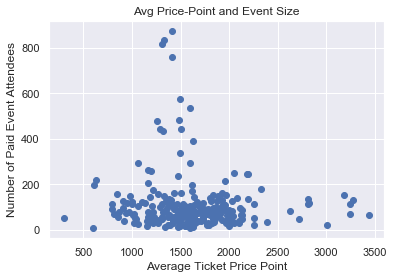

In [18]:
# Is there a correlation between price point and total number of paid attendees?
sns.set()
x = events.Total_Rev/events.Total_Dels
y = events.Total_Dels
plt.scatter(x,y)
plt.title("Avg Price-Point and Event Size")
plt.xlabel("Average Ticket Price Point")
plt.ylabel("Number of Paid Event Attendees")
plt.show()

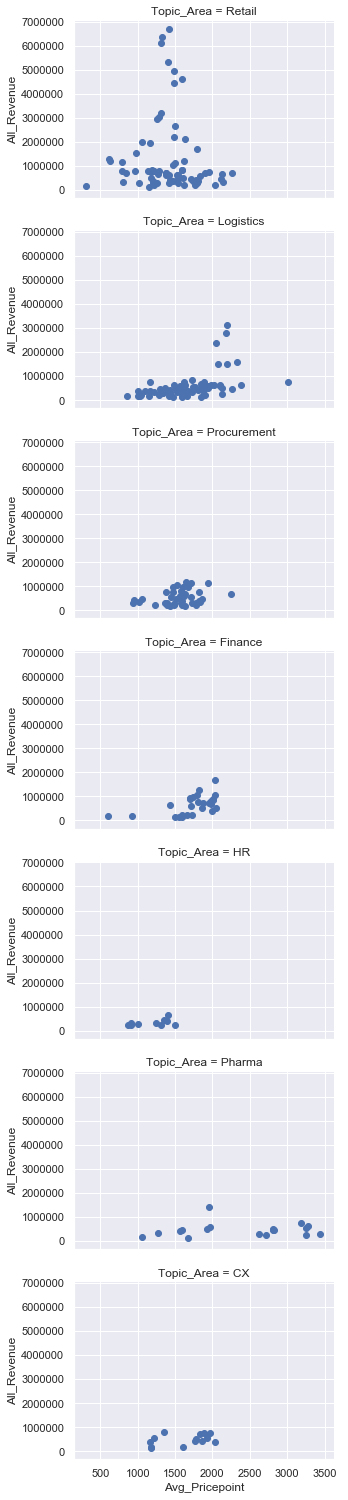

In [19]:
# Price point to event revenue correlation BY EVENT TOPIC AREA
sns.set()

events['Avg_Pricepoint'] = events.Total_Rev/events.Total_Dels
events['All_Revenue'] = events.Total_Rev+events.Spex_Rev

df = events[['Avg_Pricepoint', 'All_Revenue', 'Topic_Area']]
fg = sns.FacetGrid(data=df, row='Topic_Area', aspect=1.6)
fg.map(plt.scatter, 'Avg_Pricepoint', 'All_Revenue').add_legend()

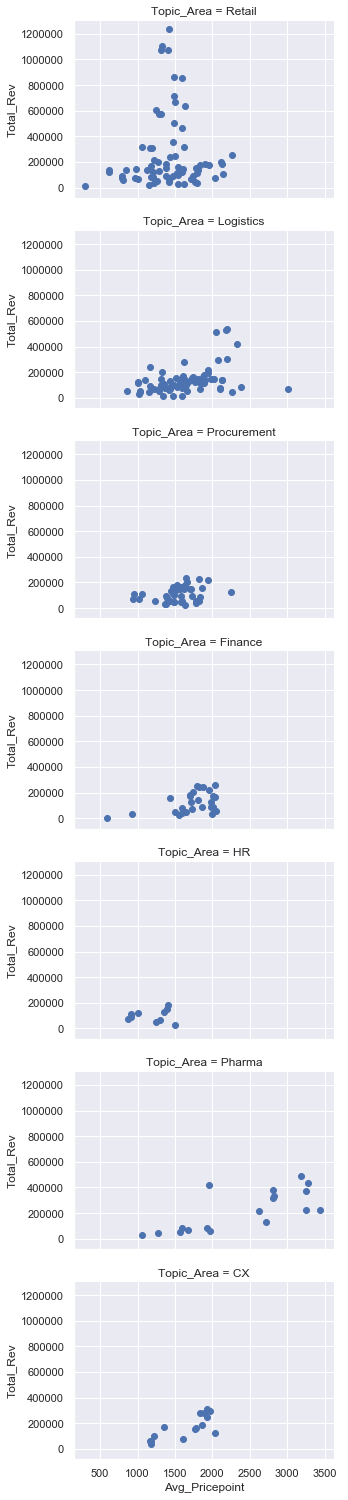

In [20]:
# Price point to total attendee revenue correlation BY EVENT TOPIC AREA
df = events[['Avg_Pricepoint', 'Total_Rev', 'Topic_Area']]
fg = sns.FacetGrid(data=df, row='Topic_Area', aspect=1.6)
fg.map(plt.scatter, 'Avg_Pricepoint', 'Total_Rev').add_legend()

In [21]:
pharma_events = events[events.Topic_Area == 'Pharma']
retail_events = events[events.Topic_Area == 'Retail']
logistics_events = events[events.Topic_Area == 'Logistics']
procurement_events = events[events.Topic_Area == 'Procurement']
HR_events = events[events.Topic_Area == 'HR']

151.35906623788236 -143597.72521765166
For Pharma Events - On average, a pricepoint increase of $100 is associated with added revenue of 15135.910000000002 dollars


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


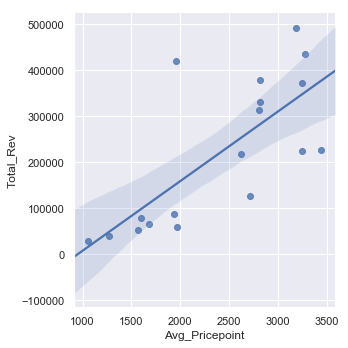

In [22]:
slope, intercept = np.polyfit(pharma_events['Avg_Pricepoint'], \
                              pharma_events['Total_Rev'], 1)
print(slope, intercept)
slope = round(slope,4)
print('For Pharma Events - On average, a pricepoint increase of $100 is associated with added revenue of', \
      slope*100, 'dollars')

# [Pharma events only] Plotting a linear regression between average event pricepoint and total revenue from passes
sns.lmplot(x='Avg_Pricepoint', y='Total_Rev', data=pharma_events)
plt.show()

44.203996858766644 199656.7614655343
For Retail Events - On average, a pricepoint increase of $100 is associated with added revenue of 4420.4 dollars


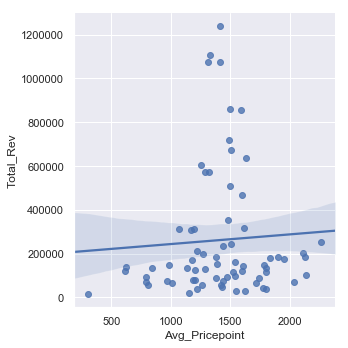

In [23]:
slope, intercept = np.polyfit(retail_events['Avg_Pricepoint'], \
                              retail_events['Total_Rev'], 1)
print(slope, intercept)
slope = round(slope,4)
print('For Retail Events - On average, a pricepoint increase of $100 is associated with added revenue of', \
      slope*100, 'dollars')

# [Retail events only] Plotting a linear regression between average event pricepoint and total revenue from passes
sns.lmplot(x='Avg_Pricepoint', y='Total_Rev', data=retail_events)
plt.show()

109.07598496219096 -41817.58262195948
For Logistics Events - On average, a pricepoint increase of $100 is associated with added revenue of 10907.599999999999 dollars


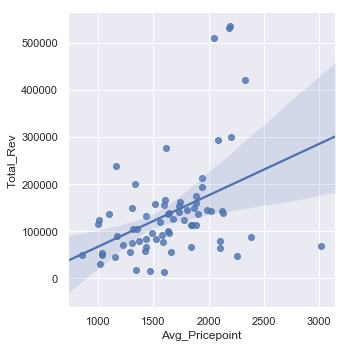

In [24]:
slope, intercept = np.polyfit(logistics_events['Avg_Pricepoint'], \
                              logistics_events['Total_Rev'], 1)
print(slope, intercept)
slope = round(slope,4)
print('For Logistics Events - On average, a pricepoint increase of $100 is associated with added revenue of', \
      slope*100, 'dollars')

# [Logistics events only] Plotting a linear regression between average event pricepoint and total revenue from passes
sns.lmplot(x='Avg_Pricepoint', y='Total_Rev', data=logistics_events)
plt.show()

66.47314304578518 8087.579621588134
Procurement Events - On average, a pricepoint increase of $100 is associated with added revenue of 6647.31 dollars


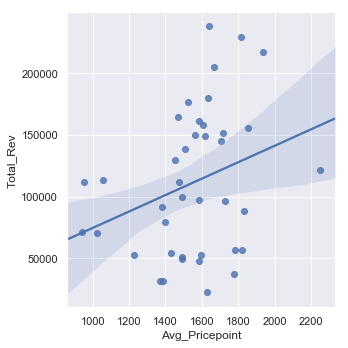

In [25]:
slope, intercept = np.polyfit(procurement_events['Avg_Pricepoint'], \
                              procurement_events['Total_Rev'], 1)
print(slope, intercept)
slope = round(slope,4)
print('Procurement Events - On average, a pricepoint increase of $100 is associated with added revenue of', \
      slope*100, 'dollars')

# [Procurement events only] Plotting a linear regression between average event pricepoint and total revenue from passes
sns.lmplot(x='Avg_Pricepoint', y='Total_Rev', data=procurement_events)
plt.show()

16.32434668438737 80633.9599154714
HR Events - On average, a pricepoint increase of $100 is associated with added revenue of 1632.43 dollars


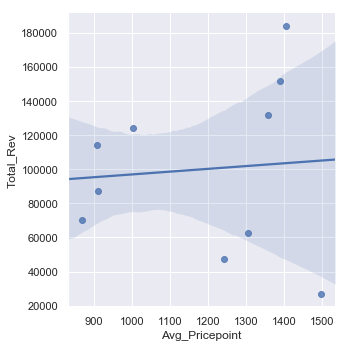

In [26]:
slope, intercept = np.polyfit(HR_events['Avg_Pricepoint'], \
                              HR_events['Total_Rev'], 1)
print(slope, intercept)
slope = round(slope,4)
print('HR Events - On average, a pricepoint increase of $100 is associated with added revenue of', \
      slope*100, 'dollars')

# [HR events only] Plotting a linear regression between average event pricepoint and total revenue from passes
sns.lmplot(x='Avg_Pricepoint', y='Total_Rev', data=HR_events)
plt.show()

37.40537966322225 87172.44871670127
After removing the outlier events - for Retail Events - on average, a pricepoint increase of $100 is associated with added revenue of 3740.54 dollars


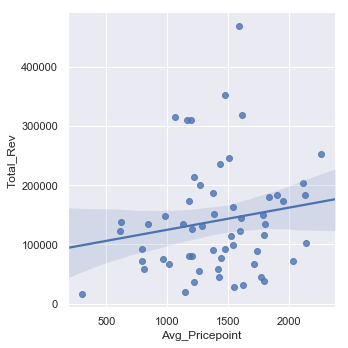

In [27]:
# Removing outliers for retail events: Delegate Revenue above $500,000 and renunning regression line
retail_events_no_ouliers = retail_events[retail_events.Total_Rev <=500000] 
slope, intercept = np.polyfit(retail_events_no_ouliers['Avg_Pricepoint'], \
                              retail_events_no_ouliers['Total_Rev'], 1)
print(slope, intercept)
slope = round(slope,4)
print('After removing the outlier events - for Retail Events - on average, a pricepoint increase of $100 is associated with added revenue of', \
      slope*100, 'dollars')

# [Retail events only] Plotting a linear regression between average event pricepoint and total revenue from passes
sns.lmplot(x='Avg_Pricepoint', y='Total_Rev', data=retail_events_no_ouliers)
plt.show()

26.491319779672057 104210.49625515593
After removing the outlier events - for Retail Events - on average, a pricepoint increase of $100 is associated with added revenue of 2649.13 dollars


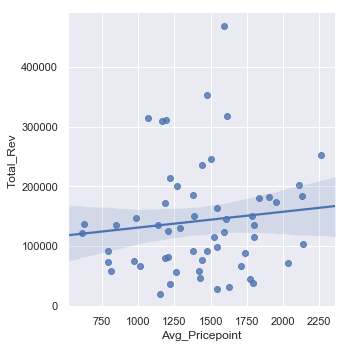

In [28]:
# Now also removing the events that have < 500 average price point as they represent mainly comped events
retail_events_no_ouliers = retail_events_no_ouliers[retail_events_no_ouliers.Avg_Pricepoint > 500]
slope, intercept = np.polyfit(retail_events_no_ouliers['Avg_Pricepoint'], \
                              retail_events_no_ouliers['Total_Rev'], 1)
print(slope, intercept)
slope = round(slope,4)
print('After removing the outlier events - for Retail Events - on average, a pricepoint increase of $100 is associated with added revenue of', \
      slope*100, 'dollars')

# [Retail events only] Plotting a linear regression between average event pricepoint and total revenue from passes
sns.lmplot(x='Avg_Pricepoint', y='Total_Rev', data=retail_events_no_ouliers)
plt.show()

### For retail events we see that the outleirs had much to do with the positive correlation between the average event price point and the total revenue from the attendees. It is possible that there is a strong pricing power in this market as total revenue remains mostly consistent, on on average, regardless of the event average price.

In [29]:
# Computing mean of total event revenue and percentiles
print ('The average total revenue for the events is', np.mean(events['All_Revenue']))
percentiles = np.array([2.5, 25, 50, 75, 97.5])
print ('with a 2.5, 25, 50, 75 and 97.5 prcetile breakdown of:', np.percentile(events['All_Revenue'],percentiles))

The average total revenue for the events is 757510.7370517928
with a 2.5, 25, 50, 75 and 97.5 prcetile breakdown of: [ 137442.75  297554.5   478018.    755231.5  4121769.  ]


In [30]:
# Computing mean of total attendee revenue and percentiles
print ('The average attendee revenue for the events is', np.mean(events['Total_Rev']))
print ('with a 2.5, 25, 50, 75 and 97.5 prcetile breakdown of:', np.percentile(events['Total_Rev'],percentiles))

The average attendee revenue for the events is 174081.12749003983
with a 2.5, 25, 50, 75 and 97.5 prcetile breakdown of: [ 23825.25  71144.   125754.   184904.5  705875.  ]


In [31]:
# Computing mean of an average event pricepoint and percentiles
print ('The average attendee revenue for the events is', np.mean(events['Avg_Pricepoint']))
print ('with a 2.5, 25, 50, 75 and 97.5 prcetile breakdown of:', np.percentile(events['Avg_Pricepoint'],percentiles))

The average attendee revenue for the events is 1612.007964191491
with a 2.5, 25, 50, 75 and 97.5 prcetile breakdown of: [ 819.30260417 1329.60481421 1592.18518519 1847.12682149 2818.81082621]


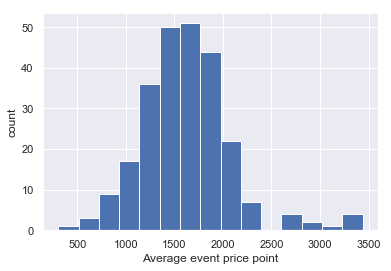

In [32]:
#histogram of average event price point - this pattern can be seen in the scatter plot as well
sns.set()

# Number of bins is the square root of number of data points: n_bins
n_data = len(events)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)

plt.hist(events['Avg_Pricepoint'], bins=n_bins)
_ = plt.xlabel('Average event price point')
_ = plt.ylabel('count')
plt.show()

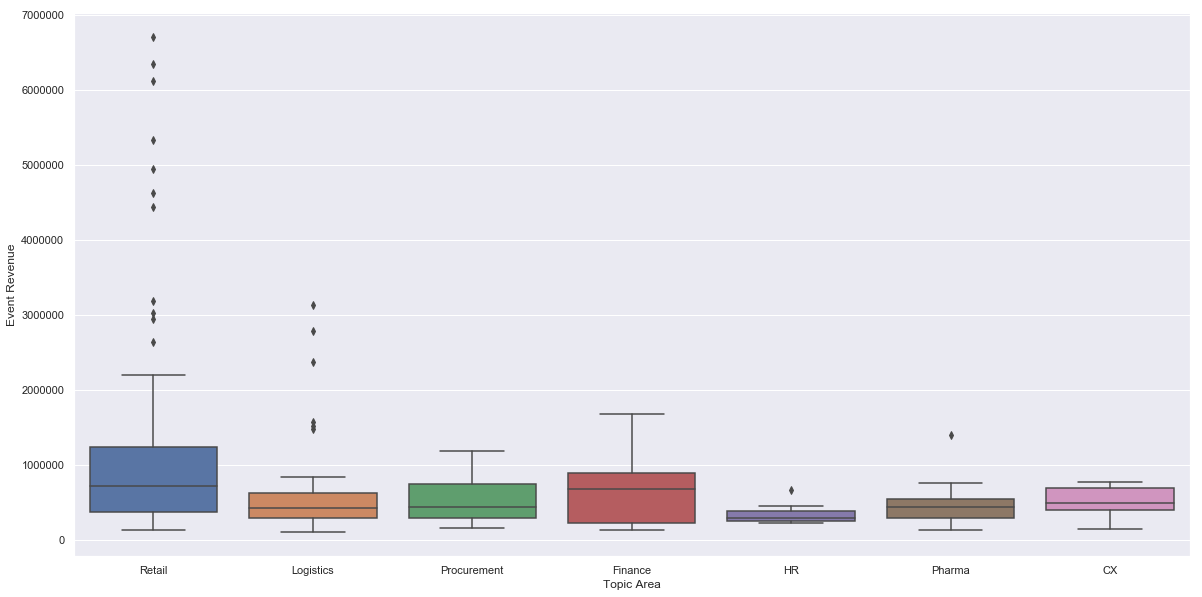

In [33]:
#box plot event revenue by topic area
plt.subplots(figsize=(20,10))
_ = sns.boxplot(x='Topic_Area', y='All_Revenue', data=events)
_ = plt.xlabel('Topic Area')
_ = plt.ylabel('Event Revenue')
plt.show()

# Many outliers , particularly in the Retail event subject area

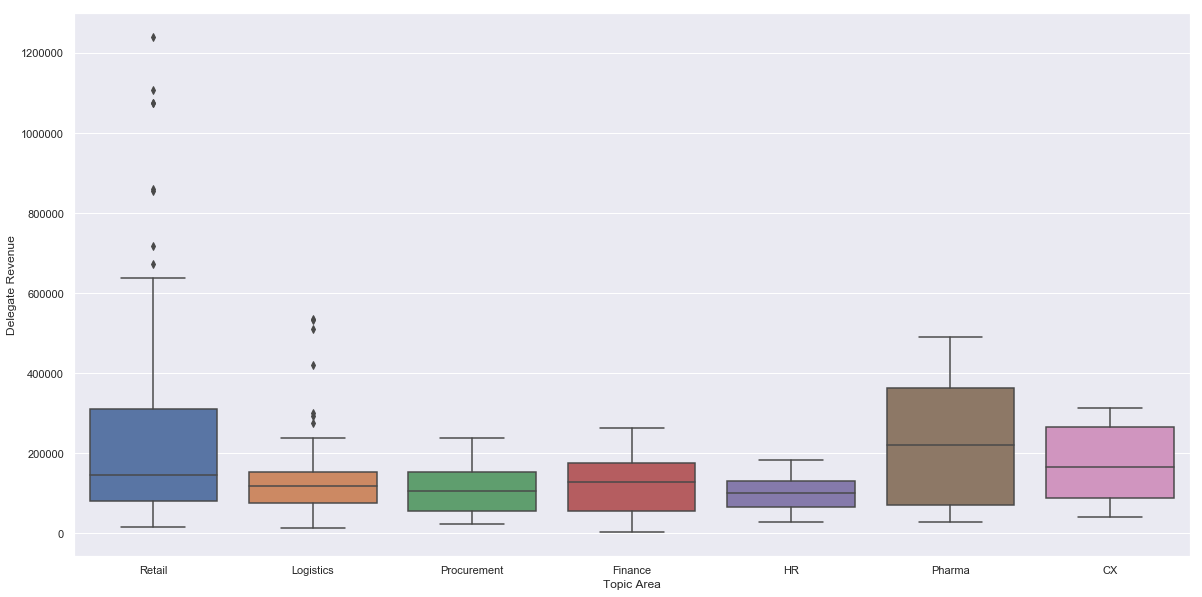

In [34]:
#box plot of attendee  revenue by topic area
plt.subplots(figsize=(20,10))
_ = sns.boxplot(x='Topic_Area', y='Total_Rev', data=events)
_ = plt.xlabel('Topic Area')
_ = plt.ylabel('Delegate Revenue')
plt.show()

# Investigate pharma further? Interesting to see the variance as being greater - much of the revenue 
#likely comes attendee passes.

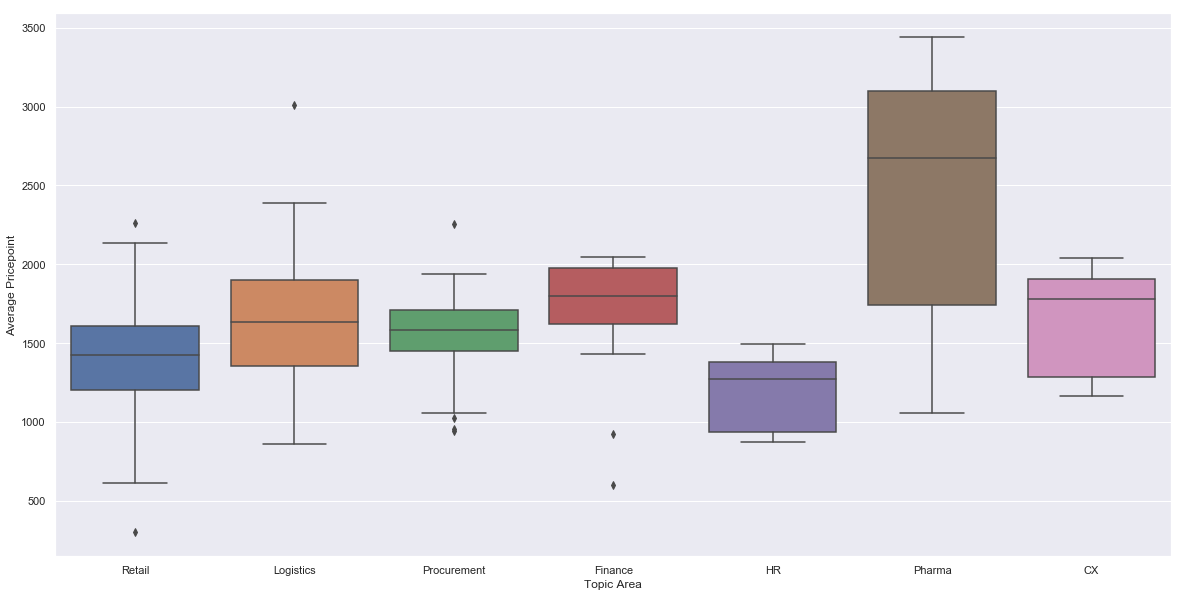

In [35]:
#box plot of attendee  revenue by topic area
plt.subplots(figsize=(20,10))
_ = sns.boxplot(x='Topic_Area', y='Avg_Pricepoint', data=events)
_ = plt.xlabel('Topic Area')
_ = plt.ylabel('Average Pricepoint')
plt.show()

In [36]:
# Merging Data sets
orders_merged = orders.merge(events, left_on='Event_Plan_Code', right_on='Code')

In [37]:
orders_merged.head()

,Created,Account_SIC,Price_List,Price_List_Type,Total_Net_Price,Account_Market,Account_Name,Campaign_Name,Contact_Job_Function,Contact_Job_Title,...,EQ_perc_of_ttl_Rev,Spex_Rev,Spex_Last_Year,Num_Spex_EQs,Num_Spex_Props,Props_Last_Year,Num_TMs,Num_SPKRs,Avg_Pricepoint,All_Revenue
0,2011-02-24 14:16:00,Advertising/Marketing,10359.007 - Vendor,Vendor,37500.0,Secondary,PMX Agency,10359.007 eTail Boston 2012: Spex Marketing wi...,MK7,Marketing Director,...,18%,1692000,1616600.0,220,33.0,165.0,292.0,148,1492.608824,2199487
1,2011-09-07 14:16:00,Directory and Mailing List Publishers,10359.007 - Vendor,Vendor,17000.0,Secondary,Infogroup,10359.007 eTail Boston 2012: Spex Marketing wi...,MK7,Marketing Manager,...,18%,1692000,1616600.0,220,33.0,165.0,292.0,148,1492.608824,2199487
2,2011-09-21 14:08:00,Software Publishers,10359.007 - Vendor,Vendor,38000.0,Secondary,Symantec,10359.007 eTail Boston 2012: Spex Marketing wi...,MK7,Event Mgr,...,18%,1692000,1616600.0,220,33.0,165.0,292.0,148,1492.608824,2199487
3,2011-09-23 14:31:00,Custom Computer Programming Services,10359.007 - Vendor,Vendor,22500.0,Secondary,SearchDex,10359.007 eTail Boston 2012: Spex Marketing wi...,MG256,Manager of Corporate Operations,...,18%,1692000,1616600.0,220,33.0,165.0,292.0,148,1492.608824,2199487
4,2011-10-31 11:53:00,IT - Data management,10359.007 - Vendor,Vendor,10000.0,Secondary,Riversand Technologies,10359.007 eTail Boston 2012: Spex Marketing wi...,MG61,_VP of Sales,...,18%,1692000,1616600.0,220,33.0,165.0,292.0,148,1492.608824,2199487


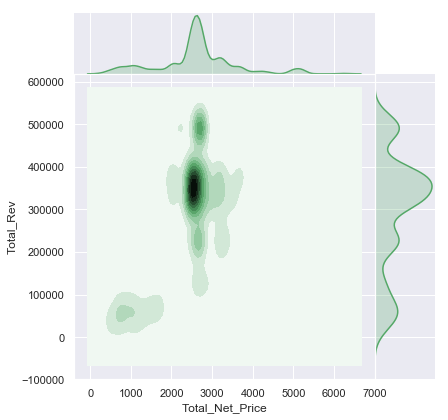

In [38]:
orders_merged_pharma = orders_merged[orders_merged.Topic_Area == 'Pharma']
orders_merged_pharma = orders_merged_pharma[orders_merged_pharma.Registration_Type == 'Delegate']
orders_merged_pharma = orders_merged_pharma[orders_merged_pharma.Price_List_Type == 'Primary']
g = sns.jointplot('Total_Net_Price', "Total_Rev", data=orders_merged_pharma, kind="kde", space=0, color="g")

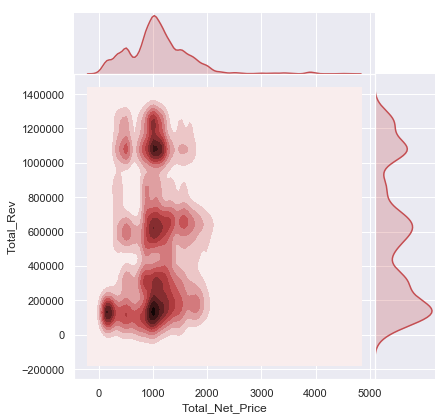

In [39]:
orders_merged_retail = orders_merged[orders_merged.Topic_Area == 'Retail']
orders_merged_retail = orders_merged_retail[orders_merged_retail.Registration_Type == 'Delegate']
orders_merged_retail = orders_merged_retail[orders_merged_retail.Price_List_Type == 'Primary']
g = sns.jointplot('Total_Net_Price', "Total_Rev", data=orders_merged_retail, kind="kde", space=0, color="r")

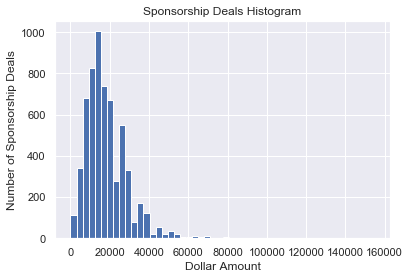

In [40]:
# Plotting Number of sponsorship deals by dollar amount.
orders_sponsors = orders_merged[orders_merged.Registration_Type == 'Sponsor']
plt.hist(orders_sponsors.Total_Net_Price, 50)
plt.xlabel('Dollar Amount')
plt.ylabel('Number of Sponsorship Deals')
plt.title('Sponsorship Deals Histogram')
plt.grid(True)
plt.show()

### Earlier we looked at what indsitries tend to pay more for events as a whole. While Pharma companies seemed to lead this ststistic, it is important to review this on some of the key event categories: Retail, Logistics and Procurement:

In [41]:
# Do certain types of companies (SIC) that pay more for retail conferences?

orders_merged_delegate_retail = orders_merged_retail[orders_merged_retail.Registration_Type == 'Delegate']
orders_merged_delegate_retail = orders_merged_delegate_retail[orders_merged_delegate_retail.\
                                                              Price_List_Type == 'Primary']
top10SIC_retail = orders_merged_delegate_retail['Total_Net_Price'].groupby(orders_merged_delegate_retail.\
                                                                    Account_SIC).agg(['mean', 'count'])
top10SIC_retail.sort_values('count', ascending=False).head(10)

,mean,count
Account_SIC,,
Clothing Stores,941.957783,636
Department Stores,974.610056,359
"Cosmetics, Beauty Supplies, and Perfume Stores",1096.148992,258
Clothing and Clothing Accessories Stores,831.980317,252
Sporting Goods Stores,963.977610,251
Investment Banking and Securities Dealing,1313.829148,223
Credit Unions,1441.705300,217
Shoe Stores,938.028986,207
Supermarkets and Other Grocery (except Conve445110,850.863131,198


In [42]:
top10SIC_retail_10_or_more = top10SIC_retail[top10SIC_retail['count'] >=10]
top10SIC_retail_10_or_more.sort_values('mean', ascending=False).head(10)

,mean,count
Account_SIC,,
Advertising/Marketing,2139.285393,89
IQ - Venture Capital,2071.727273,11
Educational Services,1854.200000,10
All Other Business Support Services,1802.250000,12
Online Payment Gateway Software,1776.521250,16
Wineries,1676.036842,19
IT Solutions & Services Providers,1579.763333,45
Software As A Service Solution Providers,1555.118023,172
Services,1536.000000,27


In [43]:
# Do certain types of companies (SIC) that pay more for logistics conferences?
orders_merged_logistics = orders_merged[orders_merged.Topic_Area == 'Logistics']
orders_merged_delegate_logistics = orders_merged_logistics[orders_merged_logistics.Registration_Type == 'Delegate']
orders_merged_delegate_logistics = orders_merged_delegate_logistics[orders_merged_delegate_logistics.\
                                                              Price_List_Type == 'Primary']
top10SIC_logistics = orders_merged_delegate_logistics['Total_Net_Price'].groupby(orders_merged_delegate_logistics.\
                                                                    Account_SIC).agg(['mean', 'count'])
top10SIC_logistics.sort_values('count', ascending=False).head(10)

,mean,count
Account_SIC,,
"Medical, Dental, and Hospital Equipment and 423450",1577.765222,406
Pharmaceutical,1351.802679,168
Medical Equipment and Supplies Manufacturing,1433.140955,157
Bio-Technology,1719.565267,131
Telecommunications,1529.937113,97
Prime Contractors - Soldier Technology,1226.863409,88
Surgical and Medical Instrument Manufacturing,1669.541279,86
Software As A Service Solution Providers,2034.299737,76
Chemical Manufacturing,993.903472,72


In [44]:
top10SIC_logistics_10_or_more = top10SIC_logistics[top10SIC_logistics['count'] >=10]
top10SIC_logistics_10_or_more.sort_values('mean', ascending=False).head(10)

,mean,count
Account_SIC,,
Management Consulting Services,2364.402000,20
"Logistics, Cargo and Storage",2290.976364,11
Machinery Manufacturing,2261.603571,14
Gasoline Engine and Engine Parts Manufacturing,2185.580000,10
Software As A Service Solution Providers,2034.299737,76
All Other Industrial Machinery Manufacturing,2028.223333,15
Repair and Maintenance,2025.230000,10
Electric Power Generation,1977.766667,15
Lawn and Garden Equipment and Supplies Stores,1977.740000,10


In [45]:
# Do certain types of companies (SIC) that pay more for procurement conferences?
orders_merged_procurement = orders_merged[orders_merged.Topic_Area == 'Procurement']
orders_merged_delegate_procurement = orders_merged_procurement[orders_merged_procurement.Registration_Type == 'Delegate']
orders_merged_delegate_procurement = orders_merged_delegate_procurement[orders_merged_delegate_procurement.\
                                                              Price_List_Type == 'Primary']
top10SIC_procurement = orders_merged_delegate_procurement['Total_Net_Price'].groupby(orders_merged_delegate_procurement.\
                                                                    Account_SIC).agg(['mean', 'count'])
top10SIC_procurement.sort_values('count', ascending=False).head(10)

,mean,count
Account_SIC,,
Pharmaceutical,1328.579060,117
Software As A Service Solution Providers,1455.147403,77
Consumer Goods,1251.362264,53
Insurance,1296.078800,50
IQ - Federal government,991.217708,48
Investment Banking and Securities Dealing,1190.524444,45
IT Solutions & Services Providers,1730.382857,35
Chemical Manufacturing,1170.183824,34
Food Manufacturing,1319.096970,33


In [46]:
top10SIC_procurement_10_or_more = top10SIC_procurement[top10SIC_procurement['count'] >=10]
top10SIC_procurement_10_or_more.sort_values('mean', ascending=False).head(10)

,mean,count
Account_SIC,,
Advertising/Marketing,2538.175000,24
Human Resources and Executive Search Consult541612,2237.871429,21
Management Consulting Services,2203.240000,25
IT Solutions & Services Providers,1730.382857,35
"Publishing, News, Media",1458.150000,11
Software As A Service Solution Providers,1455.147403,77
Transportation,1446.715625,16
Construction Machinery Manufacturing,1443.393636,11
Home Centers,1436.780769,13


In [ ]:
## More ideas:

# Growth by year by event topic area: number of attendees, revenue, number of events per year
# ECDF
# bootstrapping - discuss with Eddy. Does it make senese in the case of this data set?

In [ ]:
#computing and plotting the ECDF
#def ecdf(data):
#    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
#    n = len(data)

    # x-data for the ECDF: x
#    x = np.sort(data)

    # y-data for the ECDF: y
#    y = np.arange(1, n+1) / n

#    return x, y

In [ ]:
# correlative lines and potential reasoning.
# removing some outliers and rerunning plots.

### Classification section

In [47]:
from datetime import datetime, timedelta
orders_merged['Days_Ahead_of_Event']  = orders_merged['Days_Ahead_of_Event'] / timedelta (days=1)
orders_merged['Days_Ahead_of_Event'].dtype

dtype('float64')

In [48]:
orders_merged_delegate = orders_merged[orders_merged.Registration_Type == 'Delegate']
np.isnan(orders_merged_delegate['Total_Net_Price'])[np.isnan(orders_merged_delegate['Total_Net_Price']) == True].size

orders_merged_delegate = orders_merged_delegate[np.isfinite(orders_merged_delegate['Total_Net_Price'])]
orders_merged_delegate = orders_merged_delegate[orders_merged_delegate['Days_Ahead_of_Event']>=0]

In [49]:
# Create arrays for features and target variable
y = orders_merged_delegate['Total_Net_Price'].values
X = orders_merged_delegate['Days_Ahead_of_Event'].values
z = orders_merged_delegate['Group_Size'].values

# Reshape X and y
y = y.reshape(-1,1)
X = X.reshape(-1,1)
z = z.reshape(-1,1)

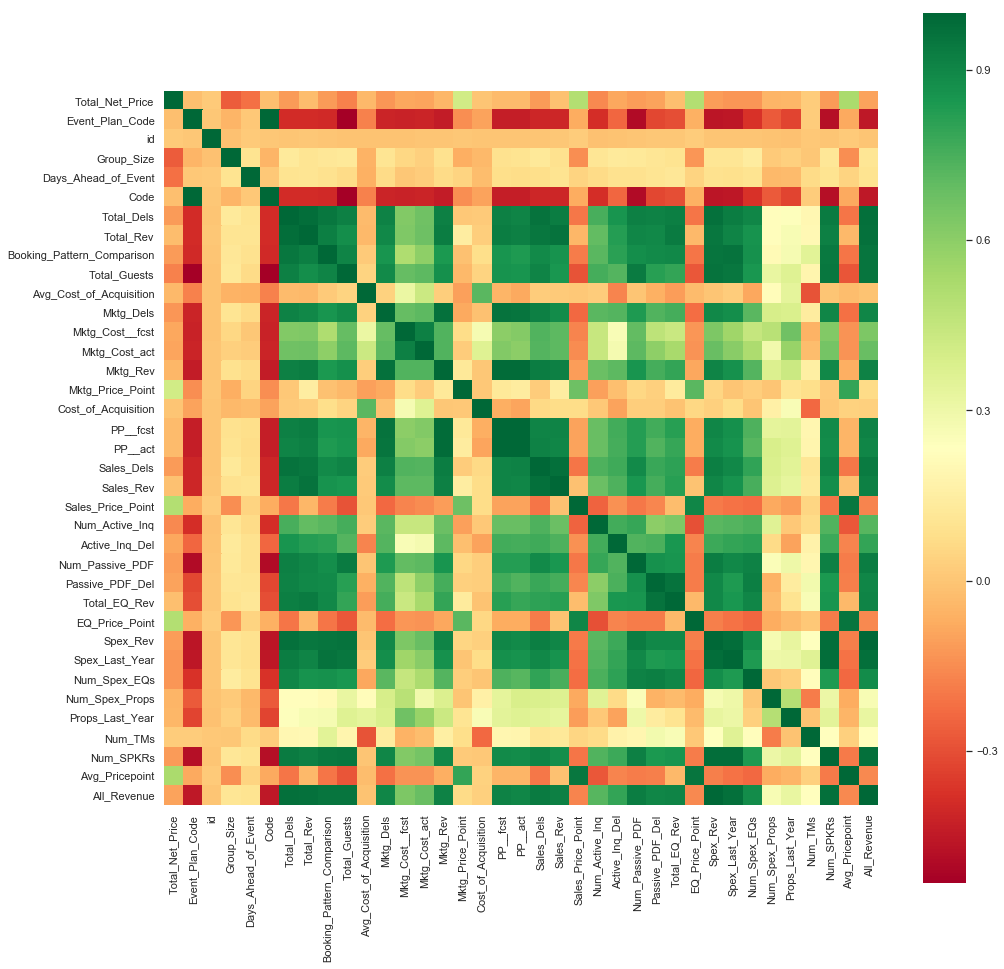

In [50]:
plt.figure(figsize=(16,16))
sns.heatmap(orders_merged_delegate.corr(), square=True, cmap='RdYlGn')

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


0.048579337678520185


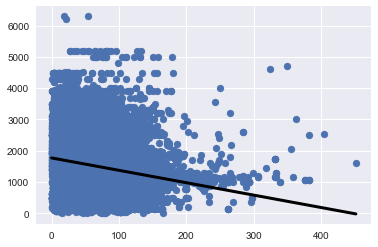

In [52]:
plt.scatter(X,y)

# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)

# Fit the model to the data
reg.fit(X, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

0.06928475300787329


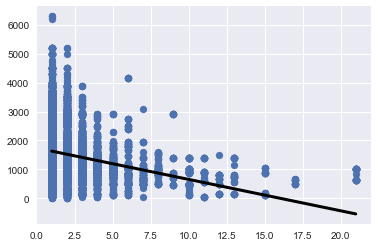

In [53]:
plt.scatter(z,y)

# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(z), max(z)).reshape(-1,1)

# Fit the model to the data
reg.fit(z, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(z, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

In [95]:
orders.head()

,Created,Account_SIC,Price_List,Price_List_Type,Total_Net_Price,Account_Market,Account_Name,Campaign_Name,Contact_Job_Function,Contact_Job_Title,...,Order_Number,Registration_Channel,Registration_Type,Sales_Method,Sales_Source,Sales_Source_Cat,id,Group_Size,job_title,Days_Ahead_of_Event
0,2011-01-03 09:22:00,Management Consulting Services,19698.001 - Vendor,Vendor,15500.0,Secondary,Taleo,NaN,LW10,Senior Vice President and General Counsel,...,1-3341865771,Not Available,Sponsor,NaN,SMBARRETT,Sponsorship,34473,1,VP,120 days
1,2011-01-03 09:47:00,Army,10665.005 - Standard,Primary,1949.0,Primary,US Army Audit Agency,10665.005 HCMD 2011: Unknown without MACs,HR254,Human Capital Manager,...,1-3341957177-A,Website,Delegate,NaN,Marketing,Marketing,12735,2,Manager,41 days
2,2011-01-03 09:48:00,Web Search Portals,10701.005-Vendor,Vendor,3089.0,Secondary,Google,10701.005 ETail West 2011 Delegate Sales Campa...,HR253,Head Of Industry,...,1-3342074626,Outbound Phone,Delegate,Full Delegate Sale,TSPETERS,Delegate Sales,66732,1,C-Level,49 days
3,2011-01-03 09:51:00,Software As A Service Solution Providers,10701.005-Vendor,Vendor,0.0,Secondary,Gigya,NaN,MK48,National Sales Director,...,1-3342079261,Phone,Sponsorship Guest,NaN,Marketing,Marketing,11220,1,Director,49 days
4,2011-01-03 09:53:00,Software As A Service Solution Providers,10553.005 - Vendor,Vendor,0.0,Secondary,PTC,NaN,MK7,Marketing Communications Manager,...,1-3342070411-A,Not Available,Sponsorship Guest,NaN,Marketing,Marketing,5795,2,Manager,21 days


In [115]:
orders_merged_delegate.isnull().values.ravel().sum()

28531

In [111]:
orders_merged_delegate.dtypes
#list(orders_merged_delegate)

Created                       datetime64[ns]
Total_Net_Price                      float64
Event_Plan_Code                      float64
id                                     int64
Group_Size                             int64
Days_Ahead_of_Event                  float64
Code                                 float64
Total_Dels                             int64
Total_Rev                              int64
Booking_Pattern_Comparison           float64
Total_Guests                         float64
Avg_Cost_of_Acquisition              float64
Sales_and_Mktg_ROI                    object
Mktg_Dels                              int64
Mktg_Cost__fcst                      float64
Mktg_Cost_act                        float64
Mktg_Rev                               int64
Mktg_perc_of_ttl_Rev                  object
Mktg_Price_Point                     float64
Cost_of_Acquisition                  float64
PP__fcst                             float64
PP__act                              float64
ROI__fcst 

In [162]:
orders_merged.to_csv('data__for__ml.csv')

In [156]:
orders_merged_delegate = orders_merged[orders_merged.Registration_Type == 'Delegate']
orders_merged_delegate['EQ_perc_of_ttl_Rev'] = orders_merged_delegate['EQ_perc_of_ttl_Rev'].replace('[\%, ]', '', regex=True)
orders_merged_delegate['Mktg_perc_of_ttl_Rev'] = orders_merged_delegate['Mktg_perc_of_ttl_Rev'].replace('[\%, ]', '', regex=True)
orders_merged_delegate['Sales_perc_of_ttl_rev'] = orders_merged_delegate['Sales_perc_of_ttl_rev'].replace('[\%, ]', '', regex=True)
orders_merged_delegate['Active_Conversion_Rate'] = orders_merged_delegate['Active_Conversion_Rate'].replace('[\%, ]', '', regex=True)
orders_merged_delegate['Passive_Conversion_Rate'] = orders_merged_delegate['Passive_Conversion_Rate'].replace('[\%, ]', '', regex=True)
orders_merged_delegate['ROI__fcst'] = orders_merged_delegate['ROI__fcst'].replace('[\%, ]', '', regex=True)
orders_merged_delegate['ROI__act'] = orders_merged_delegate['ROI__act'].replace('[\%, ]', '', regex=True)
orders_merged_delegate['Sales_and_Mktg_ROI'] = orders_merged_delegate['Sales_and_Mktg_ROI'].replace('[\%, ]', '', regex=True)
orders_merged_delegate = orders_merged_delegate.drop('Event_Plan_Start_Date', 1)
orders_merged_delegate = orders_merged_delegate.drop('Event_Plan_Date', 1)
orders_merged_delegate = orders_merged_delegate.drop('Order_Date', 1)
orders_merged_delegate = orders_merged_delegate.drop('Event_Plan_Name', 1)
orders_merged_delegate = orders_merged_delegate.drop('Promotion_Plan', 1)
orders_merged_delegate = orders_merged_delegate.drop('Type', 1)
orders_merged_delegate = pd.concat([orders_merged_delegate.drop('Topic_Area', axis=1)\
                                    , pd.get_dummies(orders_merged_delegate['Topic_Area'])], axis=1)
orders_merged_delegate = pd.concat([orders_merged_delegate.drop('job_title', axis=1)\
                                    , pd.get_dummies(orders_merged_delegate['job_title'])], axis=1)
orders_merged_delegate = pd.concat([orders_merged_delegate.drop('Sales_Source_Cat', axis=1)\
                                    , pd.get_dummies(orders_merged_delegate['Sales_Source_Cat'])], axis=1)
orders_merged_delegate = orders_merged_delegate.drop('Sales_Source', axis=1)
orders_merged_delegate = pd.concat([orders_merged_delegate.drop('Sales_Method', axis=1)\
                                    , pd.get_dummies(orders_merged_delegate['Sales_Method'])], axis=1)
orders_merged_delegate = orders_merged_delegate.drop('Registration_Type', 1)
orders_merged_delegate = orders_merged_delegate.drop('Contact_Job_Title', 1)
orders_merged_delegate = orders_merged_delegate.drop('Registration_Channel', 1)
orders_merged_delegate = orders_merged_delegate.drop('Order_Number', 1)
orders_merged_delegate = orders_merged_delegate.drop('MAC', 1)
orders_merged_delegate = orders_merged_delegate.drop('Currency', 1)
orders_merged_delegate = orders_merged_delegate.drop('Contact_Job_Function', 1)
orders_merged_delegate = orders_merged_delegate.drop('Campaign_Name', 1)
orders_merged_delegate = orders_merged_delegate.drop('Account_Name', 1)
orders_merged_delegate = orders_merged_delegate.drop('Account_Market', 1)
orders_merged_delegate = pd.concat([orders_merged_delegate.drop('Price_List_Type', axis=1)\
                                    , pd.get_dummies(orders_merged_delegate['Price_List_Type'])], axis=1)
orders_merged_delegate = orders_merged_delegate.drop('Price_List', 1)
orders_merged_delegate = orders_merged_delegate.drop('Created', 1)
orders_merged_delegate = orders_merged_delegate.drop('Account_SIC', 1)
# maybe reintroduce account SIC later via LabelEncoder?
orders_merged_delegate = orders_merged_delegate.dropna()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

#looking at primary passes only
orders_merged_delegate_primary = orders_merged_delegate[orders_merged_delegate.Primary == 1]

y = orders_merged_delegate_primary['Total_Net_Price']
X = orders_merged_delegate_primary.drop('Total_Net_Price', 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
regr = RandomForestRegressor(max_depth=3, random_state=1)
regr.fit(X_train, y_train)

print(regr.feature_importances_)

print(regr.predict(X_test))

print(regr.score(X_test, y_test))

[0.         0.         0.         0.00953349 0.         0.
 0.         0.00472324 0.01300962 0.         0.00114659 0.
 0.         0.         0.         0.         0.00119719 0.
 0.         0.         0.         0.         0.         0.00426294
 0.00431807 0.16443041 0.         0.         0.         0.
 0.         0.         0.         0.53936318 0.         0.04349928
 0.00398051 0.         0.00718932 0.         0.         0.
 0.15868913 0.00055887 0.         0.         0.         0.
 0.01532475 0.         0.         0.         0.         0.
 0.         0.         0.         0.01653079 0.01224263 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
[2779.85555007 1658.51511898  998.28307603 ...  998.28307603 1199.1088905
  998.28307603]
0.6345285722002155


In [158]:
### Lasso
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001,normalize=True, max_iter=1000)
lassoreg.fit(X_train, y_train)
print(lassoreg.predict(X_test))
print(lassoreg.coef_)
print(lassoreg.intercept_)

[2505.65626283 1770.40915146 1135.82815528 ...  914.73385763 1139.4069243
 1147.89803735]
[ 2.80150444e-03 -1.87700306e-04 -3.04466218e+01 -6.13895495e-01
  1.53730829e-05 -1.14377608e+00  5.54831457e-04  2.65728042e-01
 -4.21855813e-01 -5.08551703e-01 -7.81457875e-03 -0.00000000e+00
  5.65238227e-03  5.04501096e-04  5.31506503e-04 -2.10031827e+01
  7.90290921e-02  3.38431556e-02  5.99411128e-05  4.04878536e-05
  1.16436072e-01  1.68604705e-02 -6.33352680e+00  3.20350083e-03
 -9.69353999e+00 -1.19920576e-01  3.69070895e-01  5.28539789e+00
  1.19985033e-02  5.93194482e-02 -9.77773912e-03  1.68378907e+01
 -3.10557258e-05  8.25197381e-02 -1.08289366e+01  4.21309616e-06
 -1.21998473e-04 -6.90492834e-02  1.22067110e+00  4.25018168e-01
  6.46646724e-02 -8.28714810e-01  4.81336098e-01  1.23090722e-04
  2.28970764e+01  1.28201800e+02 -4.61695501e+02 -0.00000000e+00
  2.29377280e+02  4.65626911e+01 -1.19551853e+01 -2.60776422e+01
 -1.26864673e+02  6.26538471e+00  0.00000000e+00 -3.31045930e+01


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [159]:
headers = list(orders_merged_delegate_primary)
coef = lassoreg.coef_
headers.pop(0)
lasso_coef = pd.DataFrame(
    {'header': headers,
     'coef': coef,
    })

In [160]:
print(lasso_coef)

                        header          coef
0              Event_Plan_Code  2.801504e-03
1                           id -1.877003e-04
2                   Group_Size -3.044662e+01
3          Days_Ahead_of_Event -6.138955e-01
4                         Code  1.537308e-05
5                   Total_Dels -1.143776e+00
6                    Total_Rev  5.548315e-04
7   Booking_Pattern_Comparison  2.657280e-01
8                 Total_Guests -4.218558e-01
9      Avg_Cost_of_Acquisition -5.085517e-01
10          Sales_and_Mktg_ROI -7.814579e-03
11                   Mktg_Dels -0.000000e+00
12             Mktg_Cost__fcst  5.652382e-03
13               Mktg_Cost_act  5.045011e-04
14                    Mktg_Rev  5.315065e-04
15        Mktg_perc_of_ttl_Rev -2.100318e+01
16            Mktg_Price_Point  7.902909e-02
17         Cost_of_Acquisition  3.384316e-02
18                    PP__fcst  5.994111e-05
19                     PP__act  4.048785e-05
20                   ROI__fcst  1.164361e-01
21        

In [161]:
significant_coefs = lasso_coef[(lasso_coef.coef >= 10) | (lasso_coef.coef <= -10)]
print(significant_coefs)

                     header        coef
2                Group_Size  -30.446622
15     Mktg_perc_of_ttl_Rev  -21.003183
31  Passive_Conversion_Rate   16.837891
34       EQ_perc_of_ttl_Rev  -10.828937
44                       CX   22.897076
45                  Finance  128.201800
46                       HR -461.695501
48                   Pharma  229.377280
49              Procurement   46.562691
50                   Retail  -11.955185
51                  C-Level  -26.077642
52               Consultant -126.864673
55                    Other  -33.104593
57           Delegate Sales -119.851046
61           ACD Conversion -239.697104
62       Full Delegate Sale -275.572004
63       Inquiry Conversion -167.388359
64           PDF Conversion -215.358226
65                   Upsell -382.685777


In [ ]:
### Lasso regression 
### Single decision tree between the random forest